# Task 0: Choosing you project topic

We select the problem type 1: Focusing on Data Modelling and the dataset we choose is Online Shoppers Purchasing Intention Dataset Data Set. the goal of this topic we want to gain that which kind of the customer intends to shopping using classification. With clustering, we will identify customer segmentation based on selected two features

# Task 1: Retrieving and Preparing the Data

<h4><b>Import library</b></h4>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, chi2, SelectKBest
set_config(display='diagram')

<h4><b>Load data</b></h4>

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv', sep=',')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<h4><b>Data description</b></h4>

<p>The dataset consists of 10 numerical and 8 categorical attributes.</p>
<p>The 'Revenue' attribute can be used as the class label.</p>
<p>We refer to split the data set into train set and test set with ratio 70%-30%. Test set will be kept to calculate the accuracy of the model</p>

In [3]:
df, test_df = train_test_split(data, test_size=0.3, random_state=0)
train_df, val_df = train_test_split(df, test_size=0.75, random_state=0)

### a) Check data types

In [4]:
train_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

The data types are the same as description of the dataset

### b) Deal with missing values
We check the data type of each column and whether the column has missing value

In [5]:
train_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<p>Well, there is no missing values to process</p>
<p>Next, We will select the numeric columns and category columns to handle specific types easily</p>

In [6]:
cate_cols = train_df.columns[-8:]
nume_cols = train_df.columns.drop(cate_cols)

### c) Identify outliers
In this step, we will deal with outliers on numerical columns


In [7]:
train_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000
mean,2.307835,78.836597,0.490960,33.608935,31.952712,1211.965153,0.022796,0.043019,5.514256,0.063051,2.108020,2.379230,3.181734,4.057024
std,3.345143,165.281312,1.305596,136.743142,46.484079,2045.336501,0.048836,0.048826,17.969545,0.198025,0.910624,1.760443,2.466920,3.980588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.500000,0.000000,0.013618,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,600.750000,0.002985,0.026316,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,95.170000,0.000000,0.000000,37.000000,1436.500000,0.018182,0.048235,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
max,24.000000,2629.253968,24.000000,2050.433333,705.000000,43171.233380,0.200000,0.200000,261.491286,1.000000,8.000000,13.000000,9.000000,20.000000


* Interquartile Range Method

In [8]:
Q1 = train_df[nume_cols].quantile(0.25)
Q3 = train_df[nume_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_iqr_df = train_df[~((train_df[nume_cols] < (Q1 - 1.5 * IQR)) | (train_df[nume_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Percentage of outliers: {round((1-outlier_iqr_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 56.1%


This method made us surprised that the outliers claim too high percentage so we need to visualize them

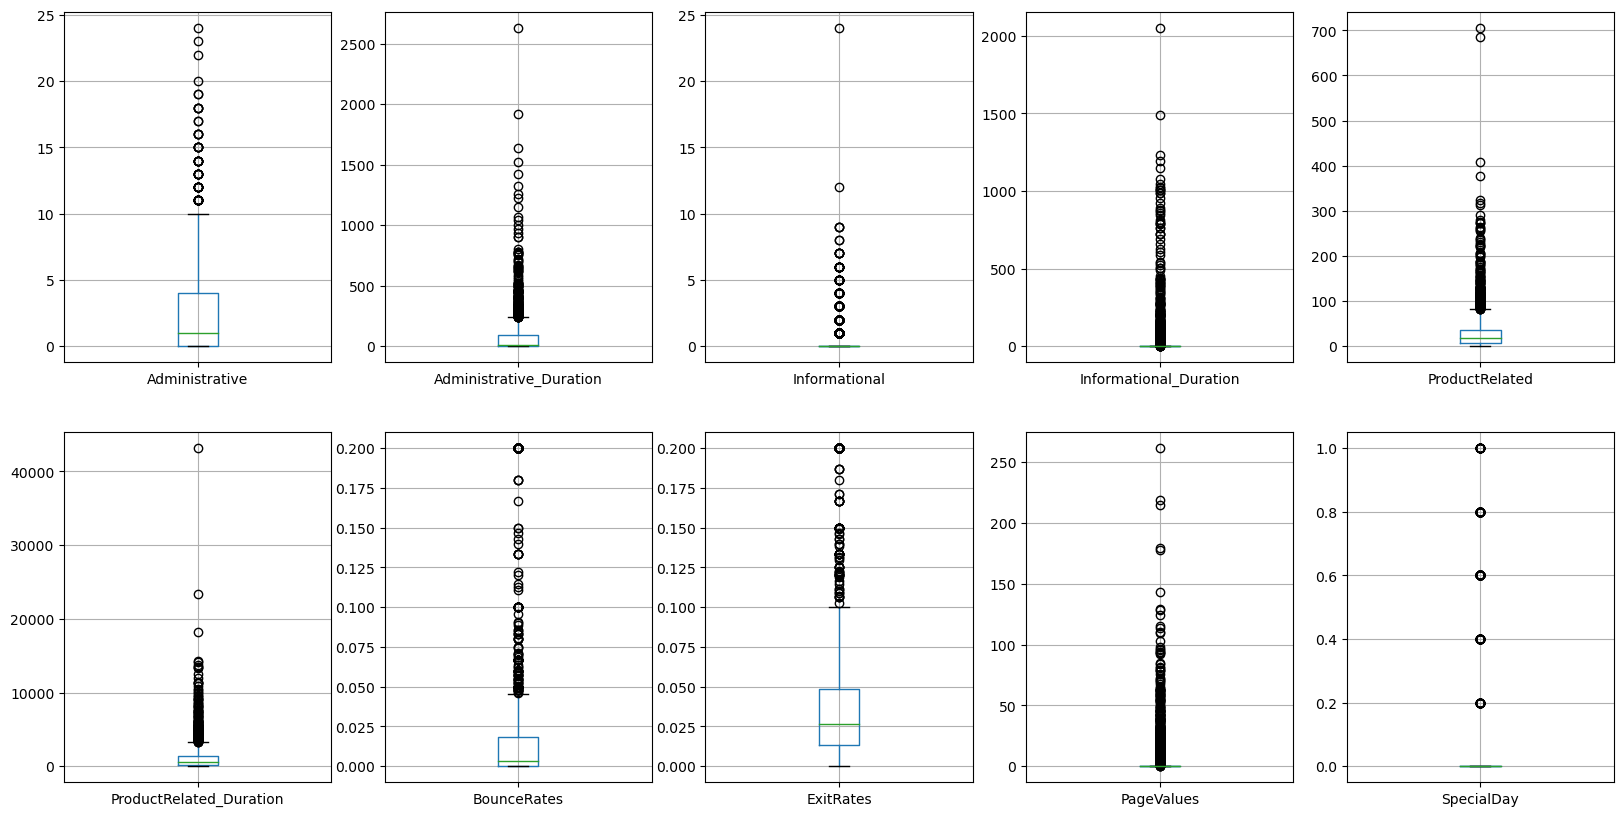

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for index in range(len(nume_cols)):
    row, col = index // 5, index % 5
    train_df.boxplot(nume_cols[index], ax = axes[row, col], fontsize=10) 
plt.show()

Look at the graph, we can see that each numerical column contains too many outliers that we can not remove them because it can affect the result

* Standard deviation method

In [10]:
data_mean, data_std = np.mean(train_df[nume_cols]), np.std(train_df[nume_cols])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outlier_std_df = train_df[~((train_df[nume_cols] < lower) | (train_df[nume_cols] > upper)).any(axis=1)]
print(f'Percentage of outliers: {round((1-outlier_std_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 18.45%


The percentage of outliers is so high that we wonder whether the values are outliers. We intend to use another method so as to handle.

* Automatic Outlier Detection

In [11]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train_df[nume_cols])
mask = yhat != -1
outlier_aod_df = train_df.iloc[mask]
print(f'Percentage of outliers: {round((1-outlier_aod_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 12.93%


<b>We can see that there are too many outliers existed in the dataset. We wonder whether they have their own meaning so we decide to ignore them.</b>

### d) Check duplicates

In [12]:
duplicates = train_df.shape[0] - train_df.drop_duplicates().shape[0]
print(f'There are {duplicates} duplicate(s) in the train set and it claims {round(duplicates*100/train_df.shape[0],2)}%')

There are 5 duplicate(s) in the train set and it claims 0.23%


The dataset contains some duplicates so we decide to remove them

In [13]:
train_df.drop_duplicates(inplace=True)

### e) Check category columns

In [14]:
for col in cate_cols:
    print(f'{col}: {train_df[col].unique()}')

Month: ['Nov' 'May' 'Oct' 'Sep' 'Dec' 'Mar' 'Aug' 'June' 'Feb' 'Jul']
OperatingSystems: [2 1 3 8 4 7 6 5]
Browser: [ 2  1  4  7 10  6 13  5  8 12  3 11]
Region: [1 9 7 3 2 8 4 5 6]
TrafficType: [13  2  6  3  1  4 20 11  8  9  5  7 18 10 15 14 16 19]
VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend: [False  True]
Revenue: [False  True]


After checking by hand, we see that the data is quite correct so we do not need to repair.
In order to handle conveniently, we will encode which columns are not number to number later 

# Task 2: Feature Engineering

To find the correlation of each features, we should encode the object values to number in order to handle

In [15]:
encode_df = train_df.copy()
LE = LabelEncoder()
obj_cols = train_df.select_dtypes(['bool', 'object'])
for col in obj_cols:
    encode_df[col] = LE.fit_transform(encode_df[col])
encode_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11154,0,0.000000,0,0.000000,2,0.000000,0.100000,0.150000,0.000000,0.0,7,2,2,1,13,2,0,0
3444,0,0.000000,0,0.000000,6,916.250000,0.000000,0.006667,0.000000,0.0,6,2,2,9,2,2,0,0
3453,4,32.100000,1,75.000000,88,3827.753571,0.000000,0.007270,0.255191,0.0,6,2,2,7,6,2,0,0
7981,2,17.133333,0,0.000000,20,1078.200000,0.020000,0.051167,0.000000,0.0,8,1,1,1,3,2,0,0
11890,6,161.833333,5,858.570833,84,2701.337954,0.010771,0.016382,7.477388,0.0,7,1,2,1,1,2,0,1


After encoding, we use selectKBest method to find the correlation between each features and revenue column. This method selects f_classif function to calculate the score

In [16]:
best_features = SelectKBest(score_func=chi2, k=7)
X = encode_df.drop(['Revenue'], axis=1)
y = encode_df['Revenue']
fit = best_features.fit(X, y)
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)
featureScores = pd.concat([columns_df, scores_df],axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score'))
features = featureScores.nlargest(7, 'Score')['Feature'].values

                    Feature          Score
5   ProductRelated_Duration  161719.697731
8                PageValues   29368.384595
3    Informational_Duration    7495.931952
1   Administrative_Duration    3078.288069
4            ProductRelated    3016.365711
0            Administrative     136.756842
2             Informational      46.399290
9                SpecialDay       9.781710
15              VisitorType       6.911266
10                    Month       6.584860


<p>We assume that top 7 most correlative with Revenue column will be appropriate for the model.</p>

# Data Modelling

### Setup

<p>In order to handle easier and cleaner, we prefer to create a pipeline for each model</p>
<p>Firstly, we should split the dataset into two parts</p>

In [17]:
cate_cols = cate_cols[:-1]
X = train_df.drop(['Revenue'], axis=1).copy()
y = train_df['Revenue'].copy()
val_X = val_df.drop(['Revenue'], axis=1).copy()
val_y = val_df['Revenue'].copy()
test_X = test_df.drop(['Revenue'], axis=1).copy()
test_y = test_df['Revenue'].copy()

<p>Some category columns have too many categories that will affect the model. So, we choose which columns that have more than 5 categories to reduce and replace which value is less than 1% of the most frequent value</p>

In [18]:
class ColTransform(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[], num_top_values_list=[], percentage=1, categories=5, default=-1):
        self.num_top_values_list = num_top_values_list
        self.columns = columns
        self.percentage = percentage
        self.categories = categories
        self.default = default

    def getLogicNumberTopValue(self, X_df, column):
        counts = X_df[column].value_counts()
        return sum([1 for value in list(counts.values) if value>(self.percentage*max(list(counts.values))/100)])

    def reprocessing_data(self, X_df):
        self.columns = [column for column in self.columns if len(X_df[column].unique())>=self.categories]
        if len(self.num_top_values_list)==0:
            self.num_top_values_list = [self.getLogicNumberTopValue(X_df, column) for column in self.columns]

    def fit(self, X_df, y=None):
        self.reprocessing_data(X_df)
        self.top_values_list = []
        for column, num_top_values in zip(self.columns, self.num_top_values_list):
            counts_ = X_df[column].value_counts()
            ids = list(counts_.index)
            self.top_values_list.append(ids[:max(1, min(num_top_values, len(ids)))])
        return self
    
    def transform(self, X_df, y=None):
        df = X_df.copy()
        for top_value, column in zip(self.top_values_list, self.columns):
            df.loc[~df[column].isin(top_value), column] = self.default
        return df

In [19]:
new_train_df = train_df.copy()
col_transform = ColTransform(columns=cate_cols)
col_transform.fit(new_train_df)
new_train_X_df = col_transform.transform(new_train_df)
new_train_X_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11154,0,0.000000,0,0.000000,2,0.000000,0.100000,0.150000,0.000000,0.0,Nov,2,2,1,13,Returning_Visitor,False,False
3444,0,0.000000,0,0.000000,6,916.250000,0.000000,0.006667,0.000000,0.0,May,2,2,9,2,Returning_Visitor,False,False
3453,4,32.100000,1,75.000000,88,3827.753571,0.000000,0.007270,0.255191,0.0,May,2,2,7,6,Returning_Visitor,False,False
7981,2,17.133333,0,0.000000,20,1078.200000,0.020000,0.051167,0.000000,0.0,Oct,1,1,1,3,Returning_Visitor,False,False
11890,6,161.833333,5,858.570833,84,2701.337954,0.010771,0.016382,7.477388,0.0,Nov,1,2,1,1,Returning_Visitor,False,True


<p>We create the Encode class to switch the object and bool value to numerical value</p>

We create the SelectFeature class to choose the selected columns above

Next, we will create the preprocess_pipeline to handle validation set [2]

In [20]:
numerics_trans = SimpleImputer()
categorical_trans=make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

column_trans = make_column_transformer(
    (numerics_trans, nume_cols),
    (categorical_trans, cate_cols)
)

preprocess_pipeline = make_pipeline(ColTransform(), column_trans, StandardScaler(with_mean=False))
preprocess_train_X = preprocess_pipeline.fit_transform(X)
preprocess_pipeline

Pipeline(steps=[('coltransform', ColTransform()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object'))])),
                ('standardscaler', StandardScaler(with_mean=False))])

### Classification
* Classification using Neural Network

`MLP Classifier`: using Neural Network method, this step would start to learning through the preprocessed data and spride out the ACCURACY of this model after training.

In [21]:
full_pipeline = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='adam', random_state=0, learning_rate_init=0.05, alpha=100, max_iter=1000))
])
full_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('coltransform', ColTransform()),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('simpleimputer',
                                                                   SimpleImputer(),
                                                                   Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']...
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object'))])),
                                 ('standardscaler',
                                  StandardScaler(with_mean=False))])),
                ('mlpclassifier',
                 MLPClassifier(alpha=100, hidden_layer_sizes=50,
                               learning_rate_init=0.05, max_iter=1000,
                               random_state=0))])

In [22]:
full_pipeline.fit(X, y)
train_acc = full_pipeline.score(X, y)*100
val_acc = full_pipeline.score(val_X, val_y)*100
print(f'With the above model pipeline we get the accuracy of train: {train_acc.round(3)} and validation: {val_acc.round(3)}')

With the above model pipeline we get the accuracy of train: 85.781 and validation: 84.863


Due to the defined paramaters of Neural Network which includes `hidden_layer_sizes=(50), activation='relu', solver='adam', random_state=0, learning_rate_init=0.05, alpha=100, max_iter=1000`, the accuracy of validation set reachs 84.863%

The accuracy does not match our expectation so we tend to optimize the current model by using grid search method

In [27]:
optimize_pipeline = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('selectkbest', SelectKBest(chi2)),
    ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(50), solver='adam', activation='relu', random_state=0, learning_rate_init=0.05, max_iter=1000))
])

param_grid_mlp = {'mlpclassifier__activation': ['logistic', 'relu', 'tanh'],
            'selectkbest__k': [3, 5, 7, 9, 11, 14]}

grid_search_mlp = GridSearchCV(optimize_pipeline, param_grid_mlp)
grid_search_mlp.fit(X, y)

In [ ]:
val_acc = grid_search_mlp.score(val_X, val_y)*100
final_score = accuracy_score(grid_search_mlp.predict(test_X), test_y, normalize=True)
print(f'With the grid searching, we found a better validate accuracy for the model with {val_acc.round(3)}%')
print(f'In conclusion, along with paramas of {grid_search_mlp.best_params_} we get the final test score in model be {final_score.round(3)*100}% in practice')

With the grid searching, we found a better validate accuracy for the model with 90.068%
In conclusion, along with paramas of {'mlpclassifier__activation': 'relu', 'selectkbest__k': 3} we get the final test score in model be 88.5% in practice


As I expected, the best activation is RELU and the number of features should be 7 features

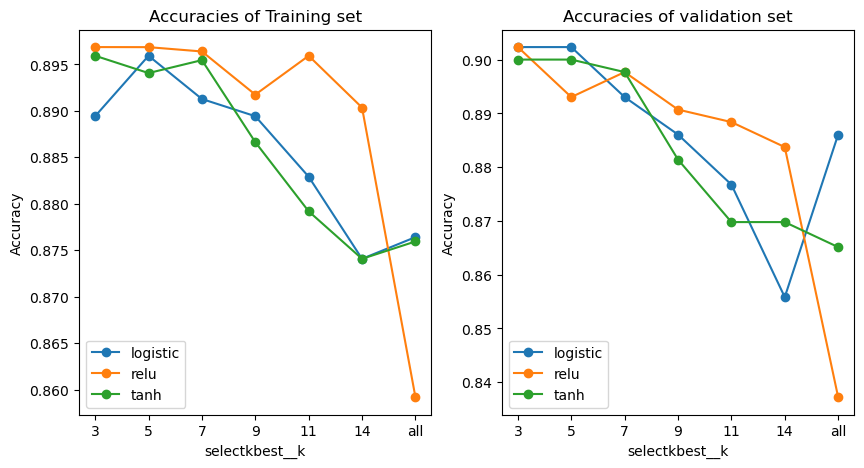

In [25]:
def plot_grid_search(grid_search, grid_params, attribute='mean_test_score', title='None'):
    scores = np.array(grid_search.cv_results_[attribute]).reshape(len(grid_params[list(grid_params.keys())[0]]), len(grid_params[list(grid_params.keys())[1]]))
    for score, param in zip(scores, grid_params[list(grid_params.keys())[0]]):
        plt.plot(grid_params[list(grid_params.keys())[1]], score, '-o', label=param)
    plt.legend(loc='lower left')
    plt.xlabel(list(grid_params.keys())[1])
    plt.ylabel('Accuracy')
    plt.title(title)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plot_grid_search(grid_search_mlp, param_grid_mlp, title='Accuracies of Training set')
plt.subplot(1, 2, 2)
plot_grid_search(grid_search_mlp, param_grid_mlp, attribute='split2_test_score', title='Accuracies of validation set')

In [26]:
# Visualizing the result
train_accs_df = pd.DataFrame(data=np.array(train_accs).reshape(len(alphas), -1),
                             index=alphas, columns=k_s)
val_accs_df = pd.DataFrame(
    data=np.array(val_accs).reshape(len(alphas), -1), 
    index=alphas, columns=k_s)
min_err = min(min(train_accs), min(val_accs))
max_err = max(max(train_accs), max(val_accs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('train accuracies'); plt.xlabel('value of k'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('validation accuracies'); plt.xlabel('value of k'); plt.ylabel('alpha');

NameError: name 'train_accs' is not defined

### Clustering

Firstly, we need to find two features which are less correlation. We only search on numerical 

In [ ]:
train_df[nume_cols].corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.645488,0.407182,0.297268,0.462023,0.413728,-0.211405,-0.294437,0.125113,-0.096407
Administrative_Duration,0.645488,1.000000,0.408878,0.287036,0.348878,0.405194,-0.140953,-0.198976,0.089178,-0.077607
Informational,0.407182,0.408878,1.000000,0.667107,0.460646,0.501515,-0.111203,-0.156308,0.079278,-0.036833
Informational_Duration,0.297268,0.287036,0.667107,1.000000,0.372254,0.417169,-0.076002,-0.106047,0.048714,-0.043576
ProductRelated,0.462023,0.348878,0.460646,0.372254,1.000000,0.882416,-0.200120,-0.282589,0.069281,-0.029624
ProductRelated_Duration,0.413728,0.405194,0.501515,0.417169,0.882416,1.000000,-0.179316,-0.243604,0.055385,-0.034409
BounceRates,-0.211405,-0.140953,-0.111203,-0.076002,-0.200120,-0.179316,1.000000,0.918609,-0.112899,0.074787
ExitRates,-0.294437,-0.198976,-0.156308,-0.106047,-0.282589,-0.243604,0.918609,1.000000,-0.160102,0.110871
PageValues,0.125113,0.089178,0.079278,0.048714,0.069281,0.055385,-0.112899,-0.160102,1.000000,-0.058051
SpecialDay,-0.096407,-0.077607,-0.036833,-0.043576,-0.029624,-0.034409,0.074787,0.110871,-0.058051,1.000000


We assume that SpecialDay is ordinary data so we tend to avoid it and select `Informational_Duration` and `PageValues` columns for clustering. The silhouette score is used for evaluating the model.

### K-means clustering

In [ ]:
from sklearn.metrics import accuracy_score
matrix = encode_df[['Informational_Duration', 'PageValues']].copy()
for n_clusters in range(2,8):
    kmeans = KMeans(n_clusters = n_clusters, n_init=10)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is: {round(silhouette_avg, 5)}')

For n_clusters = 2, the average silhouette_score is: 0.93727
For n_clusters = 3, the average silhouette_score is: 0.89155
For n_clusters = 4, the average silhouette_score is: 0.8914
For n_clusters = 5, the average silhouette_score is: 0.86374
For n_clusters = 6, the average silhouette_score is: 0.85542
For n_clusters = 7, the average silhouette_score is: 0.83121


The higher average silhouette_score, the more efficient clustering. To verify this, we create the scatter plot showing labelled data points

<AxesSubplot:xlabel='Informational_Duration', ylabel='PageValues'>

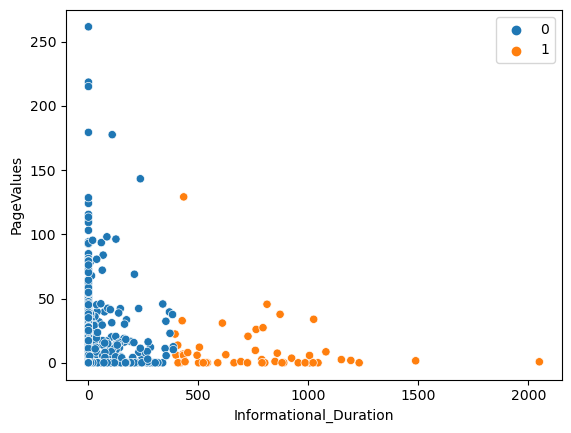

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(matrix)
label = kmeans.predict(matrix)
sns.scatterplot(data=matrix, x='Informational_Duration', y='PageValues', hue=label)

It can be seen clearly in the above figure that each cluster is well apart from each other. When one spends more time for ...

### Agglomerative Clustering

In [ ]:
matrix = encode_df[['Informational_Duration', 'PageValues']].copy()
for n_clusters in range(2,8):
    model = AgglomerativeClustering(n_clusters = n_clusters)
    clusters = model.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is : {round(silhouette_avg, 5)}')

For n_clusters = 2, the average silhouette_score is : 0.94313
For n_clusters = 3, the average silhouette_score is : 0.89849
For n_clusters = 4, the average silhouette_score is : 0.89863
For n_clusters = 5, the average silhouette_score is : 0.79008
For n_clusters = 6, the average silhouette_score is : 0.79051
For n_clusters = 7, the average silhouette_score is : 0.78854


The highest score is at n_clusters = 2 too, we need to visualize so as to have a better view

<AxesSubplot:xlabel='Informational_Duration', ylabel='PageValues'>

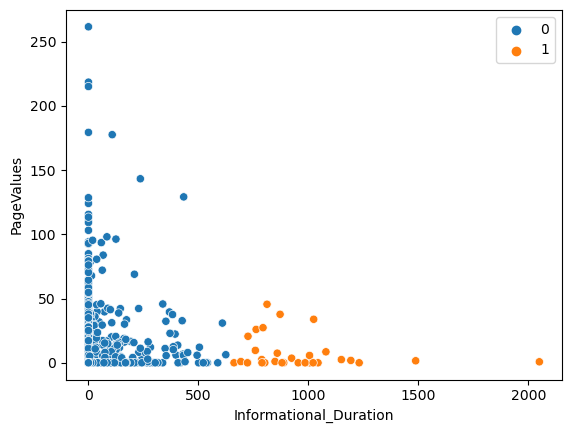

In [ ]:
model = AgglomerativeClustering(n_clusters=2)
label = model.fit_predict(matrix)
sns.scatterplot(data=matrix, x='Informational_Duration', y='PageValues', hue=label)

This method seems to get better efficiency.

# References

[1] https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ </p>
[2] https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression </p>
[3] https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c </p>